In [1]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\felipe.tufaile\Documents\GitHub\MultivariateRegression\ex1\{file}.txt'
file = 'ex1data1'
data = pd.read_csv(path.format(file=file), sep=",", header=None)
data = data.rename(columns={0:'pop_city_10k', 1:'profit_10k'})

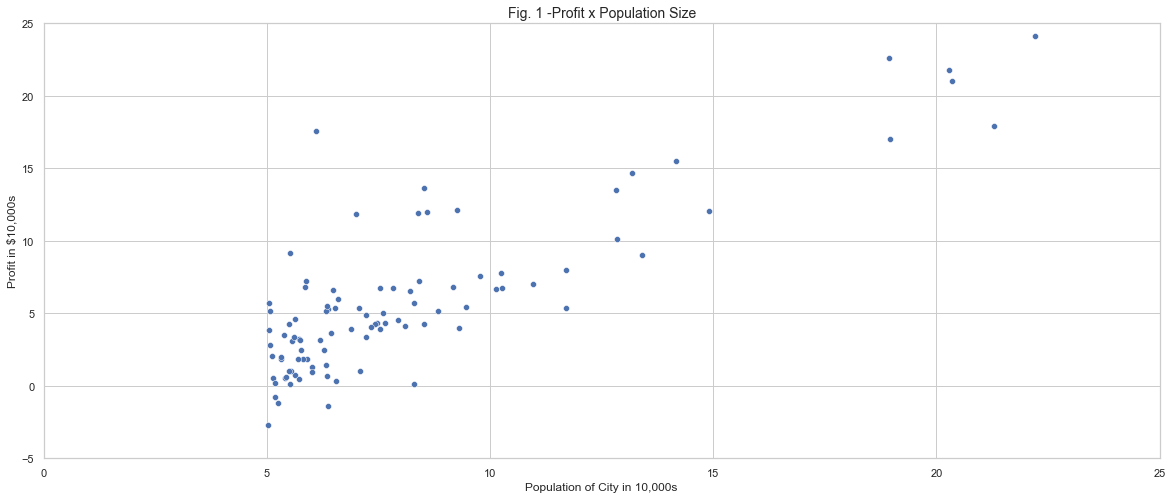

In [3]:
## WITH COMPETITORS

plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")

fg01 = sns.scatterplot(data = data,
                       x = 'pop_city_10k', 
                       y = 'profit_10k',
                       palette = 'flare',
                       markers=True
                      )

#plt.axhline(2500, color = 'red')
#plt.axvline(300, color = 'red')

plt.ylim(-5, 25)
plt.xlim(0, 25)
#plt.xticks(np.arange(0, 700, 100))
#plt.yticks(np.arange(0, 5250, 250))
plt.xlabel('Population of City in 10,000s', fontsize = 12)
plt.ylabel('Profit in $10,000s', fontsize = 12)
plt.title('Fig. 1 -Profit x Population Size', fontsize = 14)

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+0.5, point['y']+0.5, str(point['val']))

# label_point(hm_macro['pop_pet_intern_share_wt'], hm_macro['rend_percapita_wt'], hm_macro['macro_regiao'], fg01)  
                                                                                           
plt.show(fg01)

In [6]:
y = 'profit_10k'
features = ['pop_city_10k']

def return_arrays(data, y, features, iterations, alpha):

    # All columns will have the same number of rows that the number of rows in the target column
    nlines = len(data[y])

    # Number of features
    nfeatures = len(features) + 1

    # Initialize ydata and x data setting all values to one
    ydata = np.ones((nlines,1))
    xdata = np.ones((nlines,nfeatures))

    # Replace first columns with the target column
    ydata[:,0] = np.array(data[y])

    # Replace columns with feature values
    count_feature = 0
    for feature in features:
        xdata[:, count_feature] = np.array(list(data[feature]))
        count_feature += 1

    # Initialize theta
    theta = np.zeros((nfeatures, 1))

    # Calculate cost J
    j = sum((xdata@theta - ydata)**2)/(2*nlines)


    return (ydata, xdata, theta, iterations, alpha, j[0])

In [7]:
y, x, th, it, a, j = return_arrays(data=data, y = 'profit_10k', features = ['pop_city_10k'], iterations=1500, alpha=0.01)

32.072733877455654